# INF-616 - Exercício em aula - multi-classe e CV

Professor: Alexandre Ferreira -- melloferreira@ic.unicamp.br  
Monitor: Lucas David -- ra188972@students.ic.unicamp.br

Instituto de Computação - Unicamp  
2018

In [52]:
from __future__ import print_function

import numpy as np
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt

np.random.seed(42)

In [15]:
train, test = (datasets.fetch_20newsgroups_vectorized(subset=subset)
               for subset in ('train', 'test'))

In [17]:
print('20news groups dataset:')
print('samples in train:', train.data.shape)
print('target names:', train.target_names)

20news groups dataset:
samples in train: (11314, 130107)
target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


**Reduza o tamanho do conjunto de treino utilizando alguma amostragem (`train_test_split`, por exemplo), a fim de simular uma situação de  escassez de amostras**

In [24]:
train_size = 0.2
train_x, _, train_y, _ = train_test_split(train.data, train.target, train_size = train_size)
print(train_x.shape[0], 'samples were left in train.')

2262 samples were left in train.


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


**Treine um regressor logístico capaz de classificar, buscando os hiper-parâmetros com *2-Fold cross-validation***

In [38]:
folds = 2
model = LogisticRegression()
parameters = {
    #'penalty': ['l1', 'l2'],
    'C': [ 10**x for x in range(-4, 5) ],
    'multi_class': ['ovr', 'multinomial'],
    'solver': ['lbfgs']
    # more parameters...
}

# search best parameters...
f = GridSearchCV(model, parameters, cv=2, n_jobs=4).fit(train_x, train_y)

Qual foi a melhor pontuação atingida em validação?

In [47]:
# evaluation over the valid folds...
print(f.best_params_)
print(f.best_score_)

{'C': 10000, 'multi_class': 'ovr', 'solver': 'lbfgs'}
0.7011494252873564


**Reporte as métricas apropriadas e determine se este modelo é eficaz na classificação de tipos de reportagens**

Confusion matrix:


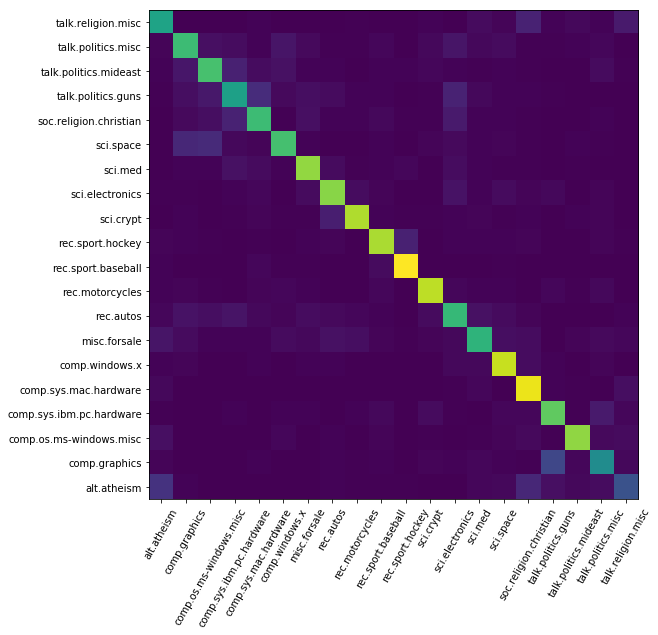

In [55]:
def pretty_confusion_matrix(cm, target_names=None):
    print('Confusion matrix:')
    plt.figure(figsize=(16, 9))
    _ = plt.imshow(cm)
    if target_names:
        _ = plt.yticks(range(len(target_names)), reversed(target_names))
        _ = plt.xticks(range(len(target_names)), target_names, rotation=60)
    
# evaluate your model...

m = confusion_matrix(y_pred=f.predict(test.data), y_true=test.target)
pretty_confusion_matrix(m, test.target_names)

Seja *a* um artigo sobre *baseball* no conjunto de teste. Com qual probabilidade seu modelo o classificará como efetivamente `rec.sport.baseball`?

R: